Install and import necessary modules

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read CSV file

In [106]:
df = pd.read_csv("vehicles.csv")

Examine File

In [107]:
df.info()
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

Looking at the Dataset info and the sample data there are is some data that is incomplete so these need to excluded.

Drop unnecessary columns

In [108]:
columns_to_drop = ['url', 'image_url', 'description'] 
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

Modify rows that don't have one of these important variables filled. Without it filled it could skew results.

In [109]:
# Handle missing values for numerical columns
numerical_columns = ['price', 'odometer']
for col in numerical_columns:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# Handle missing values for categorical columns
categorical_columns = ['condition', 'fuel', 'title_status']
for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')



Convert price, year, and odometer to numeric values.

In [110]:
for col in ['price', 'year', 'odometer']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

Remove outliers related to price and odometer

In [111]:
Q1 = df[['price', 'odometer']].quantile(0.25)
Q3 = df[['price', 'odometer']].quantile(0.75)
IQR = Q3 - Q1
outlier_filter = ~((df[['price', 'odometer']] < (Q1 - 1.5 * IQR)) | (df[['price', 'odometer']] > (Q3 + 1.5 * IQR))).any(axis=1)
df = df[outlier_filter]

make sure that all characters in dataset are lowercase

In [112]:
df = df.apply(lambda x: x.str.lower() if x.dtype == "object" else x)

Create a new variable for determining age of car

In [113]:
df['car_age'] = 2025 - df['year']

Check that datset has been modified

In [114]:
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 414356 entries, 0 to 426879
Data columns (total 24 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            414356 non-null  int64  
 1   region        414356 non-null  object 
 2   region_url    414356 non-null  object 
 3   price         414356 non-null  int64  
 4   year          413344 non-null  float64
 5   manufacturer  398469 non-null  object 
 6   model         409595 non-null  object 
 7   condition     414356 non-null  object 
 8   cylinders     242319 non-null  object 
 9   fuel          414356 non-null  object 
 10  odometer      414356 non-null  float64
 11  title_status  414356 non-null  object 
 12  transmission  411897 non-null  object 
 13  VIN           258731 non-null  object 
 14  drive         287436 non-null  object 
 15  size          117437 non-null  object 
 16  type          325106 non-null  object 
 17  paint_color   288330 non-null  object 
 18  county   

Create a heatmap to understand the correlation between price and other numerical features

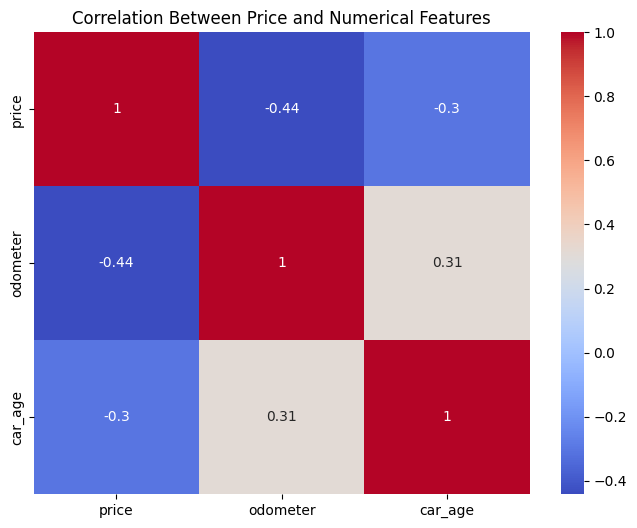

In [115]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[['price', 'odometer', 'car_age']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Between Price and Numerical Features")
plt.show()

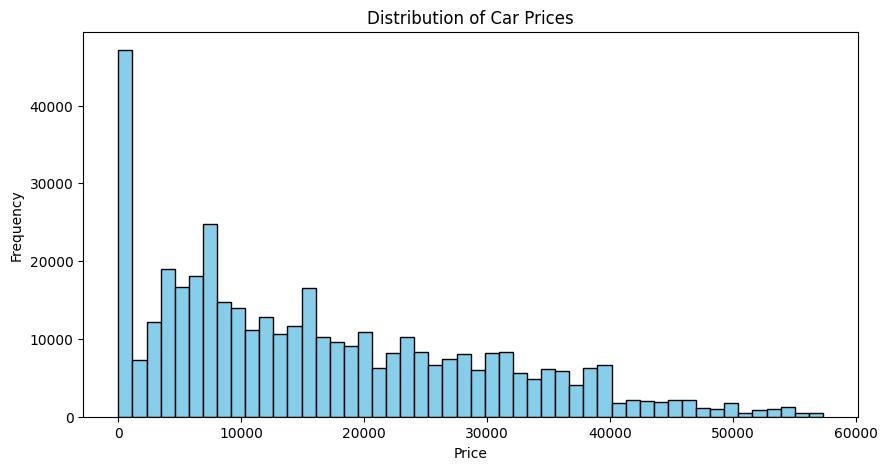

In [116]:
plt.figure(figsize=(10, 5))
plt.hist(df['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

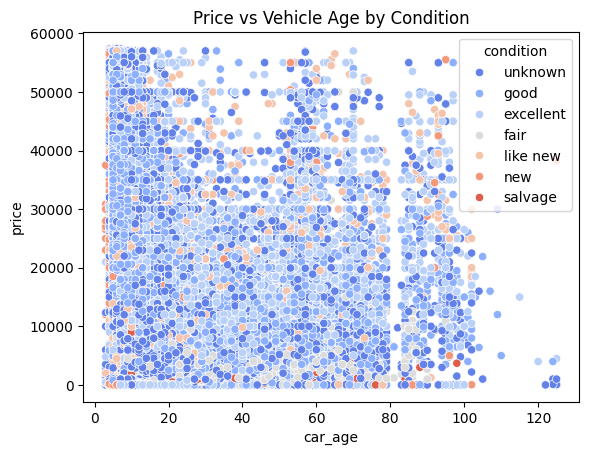

In [117]:
sns.scatterplot(data=df, x='car_age', y='price', hue='condition', palette='coolwarm')
plt.title('Price vs Vehicle Age by Condition')
plt.show()

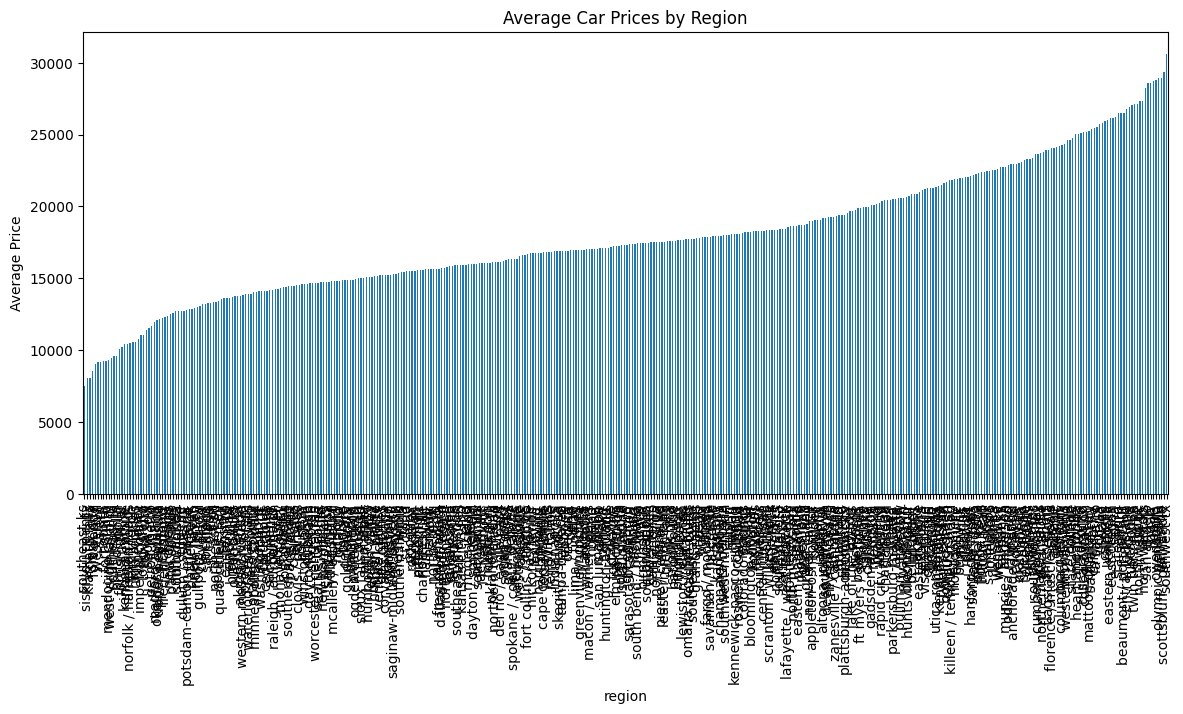

In [118]:
plt.figure(figsize=(14, 6))
region_prices = df.groupby('region')['price'].mean().sort_values()
region_prices.plot(kind='bar')
plt.title('Average Car Prices by Region')
plt.ylabel('Average Price')
plt.show()

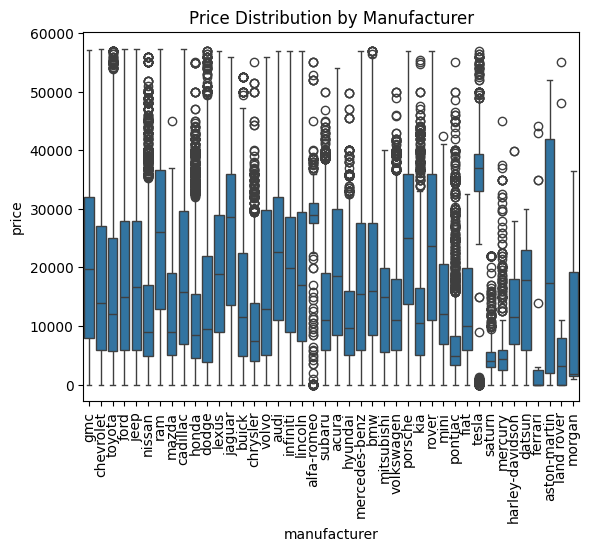

In [119]:
sns.boxplot(data=df, x='manufacturer', y='price')
plt.title('Price Distribution by Manufacturer')
plt.xticks(rotation=90)
plt.show()
